## ADA Project Milestone 2

In [49]:
!pip install gdown

# to upgrade
!pip install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 0. Data acquiring and loading


In [50]:
import gdown
url = 'https://drive.google.com/drive/folders/1PrgCkFkrxCITerLQ8ur3WA1gH3CHOwak?usp=sharing'
gdown.download_folder(url, quiet=False)

Retrieving folder list


Retrieving folder 1ccwIHOyrDgoKT_3EH22HRMbewrHHOEcl MovieSummaries
Processing file 1nHat0mTMKd3WeWE3qwEfQbgotyPlo9ar movie.metadata.tsv
Processing file 1m6w7mY9S0bOvtz-kTGo-B8YkGjskb0Ef name.clusters.txt
Processing file 1nIt_QHqCcxMiH2vbFolmqpo1LyVkPZlI plot_summaries.txt
Processing file 1UdukJlMW9MoX4IHdkaOIpReuB0vRvppq README.txt
Processing file 1uGhFD6c59a6Oixk1eUF1wlUyzcYnfyOR tvtropes.clusters.txt
Retrieving folder 1ZQpGCssrjVwZshqbaUfkKP5Wg_yeYVbn OurData
Processing file 1zJxQWM-jZ43J0QH84KFR7sSf10_EehBN CPI.csv
Processing file 1grCwUak9YDKrfCjq5vSrnZKolGSZvtr6 details_tmdb_u.csv
Processing file 1ytxZ07PohNKBOjEwiKei87XiW-S5qLMy movie_data_final_emotions.csv
Processing file 1N7asXVE39XTXj4_o2-MqbZsaCd_XIm5Z movie_data_final_violence.csv
Processing file 1_SBCZaP4yZgclVIsFum2wqy0DwW4M3rZ movie_data_final.csv
Processing file 1-2Iy6Rv92_iyW4oS2pMf-Q-uDhP18cL- movie_data.csv
Processing file 160HpzWtkVstM6w4GHKGpdDxEVND00SLx movie_details_imdb.csv
Processing file 1f2-Qx60kTst-oazXpV0Pg

Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1nHat0mTMKd3WeWE3qwEfQbgotyPlo9ar
To: /content/ADAProjecData/MovieSummaries/movie.metadata.tsv
100%|██████████| 16.3M/16.3M [00:00<00:00, 124MB/s]
Downloading...
From: https://drive.google.com/uc?id=1m6w7mY9S0bOvtz-kTGo-B8YkGjskb0Ef
To: /content/ADAProjecData/MovieSummaries/name.clusters.txt
100%|██████████| 65.4k/65.4k [00:00<00:00, 55.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nIt_QHqCcxMiH2vbFolmqpo1LyVkPZlI
To: /content/ADAProjecData/MovieSummaries/plot_summaries.txt
100%|██████████| 75.9M/75.9M [00:00<00:00, 179MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UdukJlMW9MoX4IHdkaOIpReuB0vRvppq
To: /content/ADAProjecData/MovieSummaries/README.txt
100%|██████████| 2.58k/2.58k [00:00<00:00, 5.04MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uGhFD6c59a6Oixk1eUF1wlUyzcYnfyOR
To: /content/ADAProjecData/MovieSummaries/tvtropes.clusters.txt

['/content/ADAProjecData/MovieSummaries/movie.metadata.tsv',
 '/content/ADAProjecData/MovieSummaries/name.clusters.txt',
 '/content/ADAProjecData/MovieSummaries/plot_summaries.txt',
 '/content/ADAProjecData/MovieSummaries/README.txt',
 '/content/ADAProjecData/MovieSummaries/tvtropes.clusters.txt',
 '/content/ADAProjecData/OurData/CPI.csv',
 '/content/ADAProjecData/OurData/details_tmdb_u.csv',
 '/content/ADAProjecData/OurData/movie_data_final_emotions.csv',
 '/content/ADAProjecData/OurData/movie_data_final_violence.csv',
 '/content/ADAProjecData/OurData/movie_data_final.csv',
 '/content/ADAProjecData/OurData/movie_data.csv',
 '/content/ADAProjecData/OurData/movie_details_imdb.csv',
 '/content/ADAProjecData/OurData/movie.metadata_extended.csv']

### 1. Data preprocessing

#### 1.1. Cleaning and augmentation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

data_folder = '/content/ADAProjecData/'
movie_metadata_fn = 'MovieSummaries/movie.metadata.tsv'
plot_summaries_fn = 'MovieSummaries/plot_summaries.txt'
movie_metadata_ext_fn = 'OurData/movie.metadata_extended.csv'

CPI_values = 'OurData/CPI.csv'

movie_data_fn = 'OurData/movie_data.csv'   
movie_data_tmdb_fn = 'OurData/details_tmdb_u.csv'
imdb_data_fn = 'OurData/movie_details_imdb.csv'

imdb_data_final = 'OurData/movie_data_final.csv'  
imdb_data_emotions = 'OurData/movie_data_final_emotions.csv'  
imdb_data_violence = 'OurData/movie_data_final_violence.csv'

violence_freqs = 'OurData/violen_words_distribution.pickle'


In [ ]:
# load used dfs

# CMU data
movie_meta_cmu = pd.read_csv(data_folder+movie_metadata_fn, sep='\t', header=None)
movie_sums_cmu = pd.read_csv(data_folder+plot_summaries_fn, sep='\t', header=None)

# Our data scraped from IMDB, TMDB
imdb_data = pd.read_csv(data_folder+imdb_data_fn, index_col=0)
tmdb_data = pd.read_csv(data_folder+movie_data_tmdb_fn, index_col=0)

# final dataframe, where data from IMDB, TMDB and CMU are merged and filtered
# this process is shown in this nb, but it is enough to perform it once and then just load the filtered df
movies_final = pd.read_csv(data_folder+imdb_data_final, index_col=0)

In [ ]:
movie_meta_cmu.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [ ]:
movie_sums_cmu.head()

,0,1
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [ ]:
# lets merge the dataframes to have only the movies with summaries
movie_df_cmu = movie_meta_cmu.merge(movie_sums_cmu, on=0)

In [ ]:
# total CMU movies with revenues
movie_df_cmu[4].notna().sum()

7587

In [ ]:
# resolve mistake in date of one movie
movie_df_cmu.at[32434, 3] = pd.to_datetime('2010') 

In [ ]:
# drop columns which are not needed for the analysis
movie_df_cmu= movie_df_cmu[[2,3,4,'1_y']]

In [ ]:
# rename columns
movie_df_cmu.columns = ['name', 'r_date', 'revenue', 'plot']
movie_df_cmu.head()


,name,r_date,revenue,plot
0,Ghosts of Mars,2001-08-24,14010832.0,"Set in the second half of the 22nd century, th..."
1,White Of The Eye,1987,NaN,A series of murders of rich young women throug...
2,A Woman in Flames,1983,NaN,"Eva, an upper class housewife, becomes frustra..."
3,The Sorcerer's Apprentice,2002,NaN,"Every hundred years, the evil Morgana returns..."
4,Little city,1997-04-04,NaN,"Adam, a San Francisco-based artist who works a..."


In [ ]:
movie_df_cmu['r_date'] = pd.to_datetime(movie_df_cmu['r_date'])

Text(0, 0.5, 'num_movies')

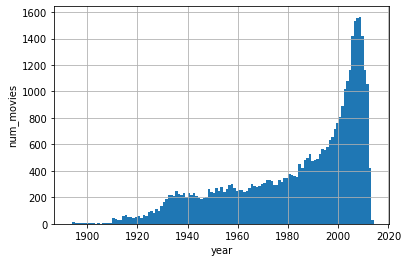

In [ ]:
# distribution of CMU movies in years (are there any missing values, so we use dropna? how many are there?)
movie_df_cmu['r_date'].dropna().hist(bins=movie_df_cmu['r_date'].dropna().max().year - movie_df_cmu['r_date'].dropna().min().year)
plt.xlabel('year')
plt.ylabel('num_movies')

Text(0, 0.5, 'num_movies')

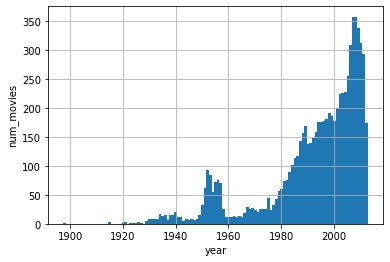

In [ ]:
# distribution of CMU movies with revenues in years
movie_df_plt = movie_df_cmu[movie_df_cmu['revenue'].notna()]
movie_df_plt['r_date'].dropna().hist(bins=movie_df_plt['r_date'].dropna().max().year - movie_df_plt['r_date'].dropna().min().year)
plt.xlabel('year')
plt.ylabel('num_movies')

In [ ]:
# show CMU plot summary lengths description
movie_df_cmu['plot'].dropna().apply(lambda x: len(x.split(' '))).describe()

count    42204.000000
mean       312.223225
std        319.246837
min          4.000000
25%         88.000000
50%        188.000000
75%        455.000000
max       4942.000000
Name: plot, dtype: float64

In [ ]:
tmdb_data.head()

,tmdb_id,r_date,imdb_id,runtime,revenue,budget,tmdb_plot,tmdb_certs
176119,2,1988-10-21,tt0094675,73.0,0.0,0.0,Taisto Kasurinen is a Finnish coal miner whose...,"[{'iso_3166_1': 'FR', 'release_dates': [{'cert..."
185208,3,1986-10-17,tt0092149,74.0,0.0,0.0,"An episode in the life of Nikander, a garbage ...","[{'iso_3166_1': 'US', 'release_dates': [{'cert..."
244929,5,1995-12-09,tt0113101,98.0,4257354.0,4000000.0,It's Ted the Bellhop's first night on the job....,"[{'iso_3166_1': 'FI', 'release_dates': [{'cert..."
245609,6,1993-10-15,tt0107286,109.0,12136938.0,21000000.0,"While racing to a boxing match, Frank, Mike, J...","[{'iso_3166_1': 'HU', 'release_dates': [{'cert..."
420448,8,2006-01-01,tt0825671,80.0,0.0,42000.0,Timo Novotny labels his new project an experim...,"[{'iso_3166_1': 'LV', 'release_dates': [{'cert..."


In [ ]:
# total movies with revenues
(tmdb_data['revenue'] >0).sum()

# we can see that number of available revenues is higher (in original dataset there are 7587 entries with revenues)

14623

In [ ]:
tmdb_data['r_date'] = pd.to_datetime(tmdb_data['r_date'])

Text(0, 0.5, 'num_movies')

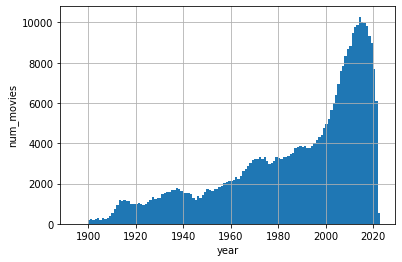

In [ ]:
# distribution of movies in years
tmdb_data['r_date'].dropna().hist(bins=tmdb_data['r_date'].dropna().max().year - tmdb_data['r_date'].dropna().min().year)
plt.xlabel('year')
plt.ylabel('num_movies')

#number of available movies in all years is higher as well

Text(0, 0.5, 'num_movies')

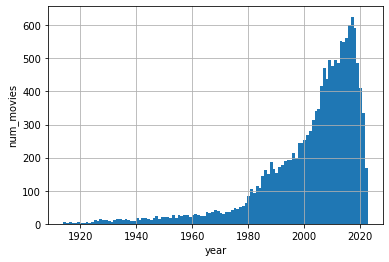

In [ ]:
movie_tmdb_rev = tmdb_data[tmdb_data['revenue']>0]
movie_tmdb_rev['r_date'].dropna().hist(bins=movie_tmdb_rev['r_date'].dropna().max().year - movie_tmdb_rev['r_date'].dropna().min().year)
plt.xlabel('year')
plt.ylabel('num_movies')

#this distribution shows that we have more revenue data as well, but we are missing the peak around 1960, so merging the data would be the best

In [ ]:
tmdb_data['tmdb_plot'].dropna().apply(lambda x: len(x.split(' '))).describe()

# we can see, that the tmbd plot data are way shorter than the ones provided in CMU summary, that's the reason, why we are downloading also the IMDB data, where are more plot alternatives and synapsis offered

count    334137.000000
mean         47.101497
std          34.746946
min           1.000000
25%          21.000000
50%          37.000000
75%          65.000000
max         214.000000
Name: tmdb_plot, dtype: float64

In [ ]:
# there is no need to print distribution over the years for the IMDB data, as the data correspond to the data from TMDB
# in other words, we use IMDB to download ratings and more rich plot descriptions for the movies obtained from TMDB
imdb_data.head()

,imdb_id,title,rating,votes,genres,plot_outline,plot,synopsis,certs
0,tt0135453,The One-Man Band,7.0,2330,"['Short', 'Comedy']","Ladies and gentlemen, tonight for your enterta...",['A band-leader assembles an orchestra by myst...,NaN,"['Norway:A::(recommended rating)', 'United Kin..."
0,tt0000304,Grandma's Reading Glass,6.1,1195,"['Short', 'Family']",Demonstrating the brand-new technique of close...,['A boy looks through glasses at various objec...,NaN,"['Norway:A::(recommended rating)', 'United Kin..."
0,tt0000300,The Enchanted Drawing,6.9,1265,"['Animation', 'Short', 'Comedy', 'Fantasy']",An easel holds a sketch pad upon which Blackto...,['A cartoonist defies reality when he draws ob...,NaN,['Norway:A::(recommended rating)']
0,tt0132251,Joan of Arc,6.6,1240,"['Short', 'Drama', 'History']","Miraculously salvaged in 1982, this grand hand...",['A divinely inspired peasant woman becomes an...,NaN,"['Norway:A::(recommended rating)', 'United Sta..."
0,tt0291476,Sherlock Holmes Baffled,5.2,696,"['Short', 'Comedy', 'Crime', 'Fantasy', 'Myste...",Sherlock Holmes enters his drawing room to fin...,['Sherlock Holmes enters his drawing room to f...,NaN,['United States:Not Rated']


In [ ]:
imdb_data['synopsis'].dropna().apply(lambda x: len(x.split(' '))).describe()

# the synopsis data are generally quite long in comparison with previous lengths, if it exists in the df

count    22378.000000
mean       942.080928
std       1037.139325
min          1.000000
25%        255.000000
50%        676.000000
75%       1242.000000
max      11396.000000
Name: synopsis, dtype: float64

In [ ]:
imdb_data['plot'].dropna().apply(lambda x: len(x.split(' '))).describe()

# the plot data are way more frequent in the df then synopsis data, but the avg length is smaller and it is often merge of several alternative plots - which we can nicely use for sentiment analysis as well!

count    212440.000000
mean        112.216042
std         171.995693
min           1.000000
25%          29.000000
50%          66.000000
75%         135.000000
max       16856.000000
Name: plot, dtype: float64

In [51]:
# this data contains CMU dataset extended with addition data from wikidata queried using SPARQL with script id_scraper.py
movie_meta_cmu_ext = pd.read_csv(data_folder+movie_metadata_ext_fn,  index_col=0)


In [52]:
# for 26k CMU movies already have scraped data in our TMDB dataset
already_scraped_mask = movie_meta_cmu_ext.tmdb_id.isin(tmdb_data.tmdb_id)
(already_scraped_mask == 1).sum()

26752

In [53]:
# Now lets see how much revenue data we would obtain from merging CMU TMDB data
merged_data = tmdb_data.merge(movie_meta_cmu_ext[already_scraped_mask], on='tmdb_id', how='outer')
merged_data['revenue_y'] = merged_data['revenue_y'].fillna(0)

In [55]:
merged_data.query('revenue_x == 0 and revenue_y > revenue_x').shape

(2215, 14)

In [56]:
# Seems reasonable, start merging!
merged_data['revenue_x'] = merged_data.apply(lambda x: x['revenue_y'] if x['revenue_x']==0 else x['revenue_x'], axis=1)

In [57]:
# final total amount of data with revenues
merged_data.query("revenue_x > 0").shape[0]

16838

In [58]:
# this dataframe contains all previous merged data, but with additional column, where were all plot summary related data merged for easier future analysis and filtered for only revenue data
movie_complete_df = pd.read_csv(data_folder+imdb_data_final,  index_col=0)

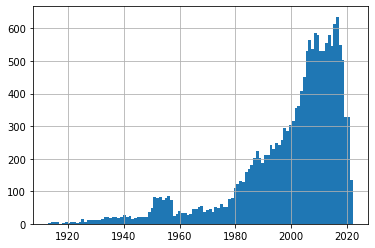

In [59]:
# distribution of the final dataset over the years
movie_complete_df['year'].hist(bins=movie_complete_df['year'].max()-movie_complete_df['year'].min()+1)

In [61]:
movie_complete_df.head()

,tmdb_id,imdb_id,revenue,title,rating,votes,genres,plots,year
4461,96128.0,tt0003471,1800000.0,Traffic in Souls,6.0,690,"['Crime', 'Drama']","A woman, with the aid of her police officer sw...",1913
4920,572090.0,tt0004391,5773000.0,Neptune's Daughter,6.0,52,['Fantasy'],The daughter of King Neptune takes on human fo...,1914
4936,285226.0,tt0004336,1500000.0,The Million Dollar Mystery,6.0,39,"['Adventure', 'Mystery']",This twenty-three episode serial told the stor...,1914
4951,174104.0,tt0004630,4100000.0,The Spoilers,6.1,81,"['Drama', 'Western']",The Spoilers is a 1914 film directed by Colin ...,1914
4985,468031.0,tt0004545,87028.0,Rose of the Rancho,3.1,41,"['Action', 'Adventure', 'Romance', 'Western']","Esra Kincaid takes land by force and, having t...",1914


In [62]:
# we can see very improved results in terms of average description length -> richness of description needed for sentiment analysis
movie_complete_df['plots'].dropna().apply(lambda x: len(x.split(' '))).describe()

count    16963.000000
mean      1106.612863
std       1206.139793
min          1.000000
25%        261.000000
50%        681.000000
75%       1598.000000
max      18099.000000
Name: plots, dtype: float64

#### 1.2 Inflation

In [63]:
# downloaded revenue data
CPI_df = pd.read_csv(data_folder + CPI_values, sep = ',', index_col=0) 
CPI_df.head()

,year,value
0,1913,9.883333
1,1914,10.016667
2,1915,10.108333
3,1916,10.883333
4,1917,12.825000


In [64]:
#convert it to dict to make it faster
CPI = {}
for i in range(CPI_df.shape[0]):
  CPI[int(CPI_df.iloc[i]['year'])] = CPI_df.iloc[i]['value']

In [65]:
def calculate_inflation(df):
    
    # This function takes a dataframe as an argument and searches the colums "year" and "revenue".
    # If "revenue" is nan, it fills it with 0.
    # The function makes a new column "unfinlated_revenue" where are the unfinlated revenues.
    # The oldest CPI is from 1913 so if the film is made before that, the uninflated revenue will be 0. 
    # The CPI data is from https://www.bls.gov/cpi/data.htm
    
    uninflated_list = []
    CPI_today = CPI[2022]
    df["revenue"].fillna(0, inplace=True)
    for i, row in enumerate(df["year"]):
        if isinstance(row, str) :
            date = row.split("-")[0]
        date = int(row)
        if date >= 1913:
            CPI_year = CPI[date]
            USD_revenue = df.iloc[i]["revenue"]
            today_value = (CPI_today / CPI_year) * USD_revenue
            uninflated_list.append(today_value)
        else:
            uninflated_list.append(0)
    df["uninflated_revenue"] = uninflated_list

In [66]:
calculate_inflation(movie_complete_df)

In [67]:
# group revenues by year and average it
revs = movie_complete_df.groupby(["year"]).revenue.mean()
uninf_revs = movie_complete_df.groupby(["year"]).uninflated_revenue.mean()

Text(0, 0.5, 'revenue')

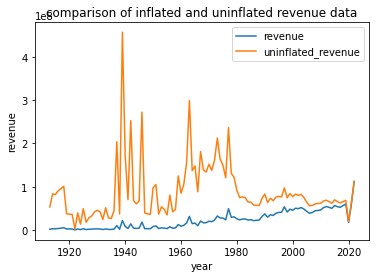

In [69]:
revs.plot(legend='inflated data')
uninf_revs.plot(legend='uninflated data')
plt.title("comparison of inflated and uninflated revenue data")
plt.xlabel("year")
plt.ylabel("revenue")

# the results of this approach copy the shape of the uninflated data, but are growing in the direction to the left, because of higher cummulative inflation

### 1,3 Plotting for the website

In [ ]:
import plotly.express as px
color_template = ['#e0b130'] + px.colors.qualitative.Prism[6:-1] + px.colors.qualitative.Prism[:5]

# plots in the website are interactive generated using plotly according to the theme specfied here

In [ ]:
# you may want to change the size or color. 
# input to the color is array of colors, which are assigned to plot sequentially - if you have only one color, and wish to select another one, just change the starting number from 0 to something else

fig = px.histogram(movies_final , x="year", template='plotly_white', color_discrete_sequence=color_template[0:], width=400, height=400)

fig.update_layout(margin=dict(b=5, l=5, r=5, t=5))
fig.show()
fig.write_html(data_folder + "hist_movs.html") # scpecify your path 

### 2. Sentiment Analysis

In [72]:
import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

#### 2.1 General Sentiment

In [71]:
# General Sentiment for each movie's plots
from textblob import TextBlob

imdb_data = pd.read_csv(data_folder+imdb_data_final,  index_col=0)
imdb_data["general_sentiment"] = imdb_data["plots"].apply(lambda x: TextBlob(str(x)).sentiment)

In [73]:
# Regression for polarity of the General Sentiment
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
imdb_data["polarity"] = imdb_data["general_sentiment"].apply(lambda x: x.polarity)
imdb_data["subjectivity"] = imdb_data["general_sentiment"].apply(lambda x: x.subjectivity)

x = imdb_data["year"].unique().reshape(-1,1)
y = imdb_data.groupby("year")["polarity"].mean().to_numpy().reshape(-1,1)

reg = LinearRegression().fit(x, y)

print(reg.coef_)
print(reg.intercept_)

[[-0.00027264]]
[0.59579119]


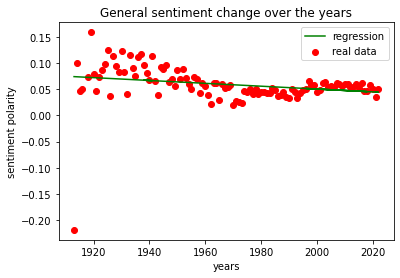

In [74]:
# Pyplot
plt.scatter(x, y, c='r')
plt.plot(x, reg.predict(x), c='g')
plt.title("General sentiment change over the years")
plt.legend(["regression", "real data"])
plt.xlabel("years")
plt.ylabel("sentiment polarity")
plt.show()

In [75]:
# Plotly
import pandas as pd
general_sentiment_df = pd.DataFrame(data=np.array(np.c_[x, y, reg.predict(x)]), columns=['years','real_data','regression'])

import plotly.express as px
import plotly.graph_objects as go

colors = px.colors.qualitative

fig1 = px.scatter(general_sentiment_df, x='years', y = 'real_data').update_traces(marker=dict(color= colors.Set1[0]))
fig1.data[0].name="real data"
fig2 = px.line(general_sentiment_df, x='years', y = 'regression').update_traces(marker=dict(color= colors.Set1[1]))
fig2.data[0].name="regression"

fig_final = go.Figure(data= fig1.data + fig2.data)

fig_final.update_layout(title_text='General sentiment change over the years',
                        xaxis_title='Years',
                        yaxis_title='Sentiment polarity', 
                        title_x= 0.5, title_font_size= 20,
                        template='plotly_white')
fig_final.update_traces(showlegend=True)
fig_final.show()
fig_final.write_html(data_folder + "sentiment_polarity.html") # scpecify your path 

In [76]:
# Regression for subjectivity of the General Sentiment
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x = imdb_data["year"].unique().reshape(-1,1)
y = imdb_data.groupby("year")["subjectivity"].mean().to_numpy().reshape(-1,1)

reg = LinearRegression().fit(x, y)

print(reg.coef_)
print(reg.intercept_)

[[-0.00012701]]
[0.69660253]


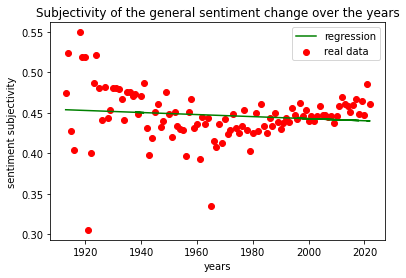

In [77]:
# Pyplot
plt.scatter(x, y, c='r')
plt.plot(x, reg.predict(x), c='g')
plt.title("Subjectivity of the general sentiment change over the years")
plt.legend(["regression", "real data"])
plt.xlabel("years")
plt.ylabel("sentiment subjectivity")
plt.show()

In [78]:
# Plotly
import pandas as pd
general_sentiment_df = pd.DataFrame(data=np.array(np.c_[x, y, reg.predict(x)]), columns=['years','real_data','regression'])

import plotly.express as px
import plotly.graph_objects as go

colors = px.colors.qualitative

fig1 = px.scatter(general_sentiment_df, x='years', y = 'real_data').update_traces(marker=dict(color= colors.Set1[0]))
fig1.data[0].name="real data"
fig2 = px.line(general_sentiment_df, x='years', y = 'regression').update_traces(marker=dict(color= colors.Set1[1]))
fig2.data[0].name="regression"

fig_final = go.Figure(data= fig1.data + fig2.data)

fig_final.update_layout(title_text='Subjectivity of the general sentiment change over the years',
                        xaxis_title='Years',
                        yaxis_title='Sentiment subjectivity', 
                        title_x= 0.5, title_font_size= 20,
                        template='plotly_white')
fig_final.update_traces(showlegend=True)
fig_final.show()
fig_final.write_html(data_folder + "sentiment_subjectivity.html") # scpecify your path 

#### 2.2 Emotions

Explanation of code/purpose

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import pipeline
classifier1 = pipeline("text-classification", model="bhadresh-savani/distilbert-base-uncased-emotion", return_all_scores=True) 
classifier2 = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True) 
classifier3 = pipeline("text-classification", model="joeddav/distilbert-base-uncased-go-emotions-student", return_all_scores=True) 

# bhadresh-savani/distilbert-base-uncased-emotion # Very good model trained on Twitter emotion [anger 🤬, disgust 🤢, fear 😨, joy 😀, sadness 😭, surprise 😲]
# j-hartmann/emotion-english-distilroberta-base   # Trained on 6 different datasets. Similar to above one, but has neutral emotion [+ neutral 😐]
# joeddav/distilbert-base-uncased-go-emotions-student # 

# All models have input limitation (512-514 words)

/usr/local/lib/python3.8/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
LENGTH_CHUNKS= 512

imdb_data2= pd.read_csv(data_folder+imdb_data_final, engine='python')
imdb_data2.reset_index(inplace= True)
imdb_data2.drop(columns=imdb_data2.columns[0], axis=1, inplace=True)
imdb_data2.head(2)

,Unnamed: 0,tmdb_id,imdb_id,revenue,title,rating,votes,genres,plots,year
0,4461,96128.0,tt0003471,1800000.0,Traffic in Souls,6.0,690,"['Crime', 'Drama']","A woman, with the aid of her police officer sw...",1913
1,4920,572090.0,tt0004391,5773000.0,Neptune's Daughter,6.0,52,['Fantasy'],The daughter of King Neptune takes on human fo...,1914


In [ ]:
print(f'Column "plots" is unique : {imdb_data2.plots.is_unique}'.format())

Column "plots" is unique : False


In [ ]:
imdb_data2.drop_duplicates(subset=['plots'], keep='last', inplace=True)

**Note:** Here we notice that we have duplicate plots, and this might be due to the fact that the movie has 2 different names, or has been refilmed as a 2nd release.

In [ ]:
print(f'Null values in column "plots" : {imdb_data2.plots.isnull().values.any()}'.format())

Null values in column "plots" : False


In [ ]:
#function to make chunks of length n words from a plot text
def chunk_text(text, n):
    words=text.split()
    for i in range(0, len(text), n):
        yield text[i:i + n]

#function that regroups words from list into text
def chunks_list(text,n):
    chuncked_text = list(chunk_text(text, n))
    chuncked_text= ["".join(word) for word in chuncked_text]
    return chuncked_text


In [ ]:
#Shuffle the data in order to get a homogenous subset of our data with respect to the year of release
test_df= imdb_data2.sample(frac = 1)
test_df= test_df.reset_index(drop= True)
test_df.head(3)

,Unnamed: 0,tmdb_id,imdb_id,revenue,title,rating,votes,genres,plots,year
0,235993,12806.0,tt0250478,370562.0,Nico and Dani,6.7,6174,"['Adventure', 'Comedy', 'Drama', 'Romance']","While his parents are away for the summer, 16-...",2000
1,261278,1441.0,tt0445946,5549200.0,The Contract,5.6,25284,"['Action', 'Crime', 'Drama', 'Thriller']",Attempting to recover from a recent family tra...,2006
2,230926,47288.0,tt0160429,12000000.0,The King and I,4.3,4155,"['Animation', 'Family', 'Fantasy', 'Musical']",Animated version of the Rodgers and Hammerstei...,1999


Here we will take a small subset of the data to test our 3 classifiers and choose which one to retain for further analysis of our fill dataset. More about it in the datastory.


In [ ]:
test_df= test_df[:50][['plots']]
test_df['chuncked_plot']= test_df['plots'].apply(lambda x: chunks_list(str(x),LENGTH_CHUNKS))
test_df.head(3)

,plots,chuncked_plot
0,"While his parents are away for the summer, 16-...","[While his parents are away for the summer, 16..."
1,Attempting to recover from a recent family tra...,[Attempting to recover from a recent family tr...
2,Animated version of the Rodgers and Hammerstei...,[Animated version of the Rodgers and Hammerste...


In [ ]:
# function that generates emotions for each chunk of the plot
def emotions_per_chunk(chunk_list, classifier):
    emotions_list=[]
    for i in range(len(chunk_list)):
        outcome1_0 = classifier(chunk_list[i])[0]
        emotions_list+=outcome1_0
    return emotions_list
  

**Analysis of 3 Different Classifiers :**

In the following code, we calculate the execution time of classifiers 1, 2 and 3, on a small subset of our dataset of size 250 movies. The purpose behind this is to choose the classifier that suits best our analysis, in terms of insightful sentiment classification, execution time and scalability.



In [ ]:
%%time 
test_df1= test_df.copy()
test_df1['emotions_per_chunk']= test_df1['chuncked_plot'].apply(lambda x: emotions_per_chunk(x, classifier1) )

CPU times: user 3min 7s, sys: 6.77 s, total: 3min 13s
Wall time: 3min 16s


In [ ]:
test_df1.head(3)

,plots,chuncked_plot,emotions_per_chunk
0,"While his parents are away for the summer, 16-...","[While his parents are away for the summer, 16...","[{'label': 'sadness', 'score': 0.0099680013954..."
1,Attempting to recover from a recent family tra...,[Attempting to recover from a recent family tr...,"[{'label': 'sadness', 'score': 0.0024726949632..."
2,Animated version of the Rodgers and Hammerstei...,[Animated version of the Rodgers and Hammerste...,"[{'label': 'sadness', 'score': 0.0041069830767..."


In [ ]:
%%time 
test_df2= test_df.copy()
test_df2['emotions_per_chunk']= test_df2['chuncked_plot'].apply(lambda x: emotions_per_chunk(x, classifier2) )

CPU times: user 2min 58s, sys: 15.6 s, total: 3min 14s
Wall time: 3min 16s


In [ ]:
%%time 
test_df3= test_df.copy()
test_df3['emotions_per_chunk']= test_df3['chuncked_plot'].apply(lambda x: emotions_per_chunk(x, classifier3) )

CPU times: user 2min 57s, sys: 21.1 s, total: 3min 18s
Wall time: 3min 18s


In [ ]:
#Computes averaged emotions scores for each movie plot, from the emotions generated for each chunk.
#Return list of emotions for each movie plot and the emotions labels (happiness, sadness, etc..)

def emotions_avg(all_emotions):
    emotions_list=[]
    emotions_df= pd.DataFrame(all_emotions[0])
    print(len(emotions_df))
    emotions_df=emotions_df.groupby(['label']).mean()
    emotions_df.reset_index(inplace=True)
    labels= list(emotions_df.label.values)

    for i in range(len(all_emotions)):
        # convert list of emotions for each chunk
        emotions_df= pd.DataFrame(all_emotions[i])
        emotions_df.head()
        # calculate the mean of emotions across different chunks
        emotions_df=emotions_df.groupby(['label']).mean()
        emotions_df.reset_index(inplace=True)

        # transpose dataframe for 0concatenation
        emotions_df= emotions_df.transpose()
        emotions_df.rename(columns=emotions_df.iloc[0], inplace= True)
        emotions_df= emotions_df.iloc[1:]
        emotions_list.append(emotions_df.iloc[0].tolist())
          
    return emotions_list, labels


In [ ]:
scores_1, labels_1= emotions_avg(test_df1['emotions_per_chunk'])
scores_2, labels_2= emotions_avg(test_df2['emotions_per_chunk'])
scores_3, labels_3= emotions_avg(test_df3['emotions_per_chunk'])

42
49
196


In [ ]:
all_emotions_df_1= pd.DataFrame(scores_1, columns=labels_1)
all_emotions_df_2= pd.DataFrame(scores_2, columns=labels_2)
all_emotions_df_3= pd.DataFrame(scores_3, columns=labels_3)

In [ ]:
fig1 = go.Figure()
fig2 = go.Figure()
fig3 = go.Figure()
fig_subplots = make_subplots(rows=1, cols=3, subplot_titles=('Classifier 1','Classifier 2','Classifier 3'))

for i in range(0, len(all_emotions_df_1.columns)):
    fig_subplots.add_trace(go.Box( y=all_emotions_df_1[all_emotions_df_1.columns[i]], 
                                  name= all_emotions_df_1.columns[i], width= 0.5), row=1, col=1)

for i in range(0, len(all_emotions_df_2.columns)):
    fig_subplots.add_trace(go.Box( y=all_emotions_df_2[all_emotions_df_2.columns[i]], 
                                  name= all_emotions_df_2.columns[i], width= 0.5), row=1, col=2)

for i in range(0, len(all_emotions_df_3.columns)):
    fig_subplots.add_trace(go.Box( y=all_emotions_df_3[all_emotions_df_3.columns[i]], 
                                  name= all_emotions_df_3.columns[i]), row=1, col=3)

fig_subplots.update_layout(height=440, width=1000, title_x=0.5,
                           title_text="Distribution of movies' emotions from 3 different classifiers", 
                           template= 'plotly_white', showlegend= False)
fig_subplots.show()

In [ ]:
fig_subplots.write_html("classifier_emotions.html")

Here we have an alternative plot with pyplot subplots :

Text(0.5, 1.0, 'Classifier 3')

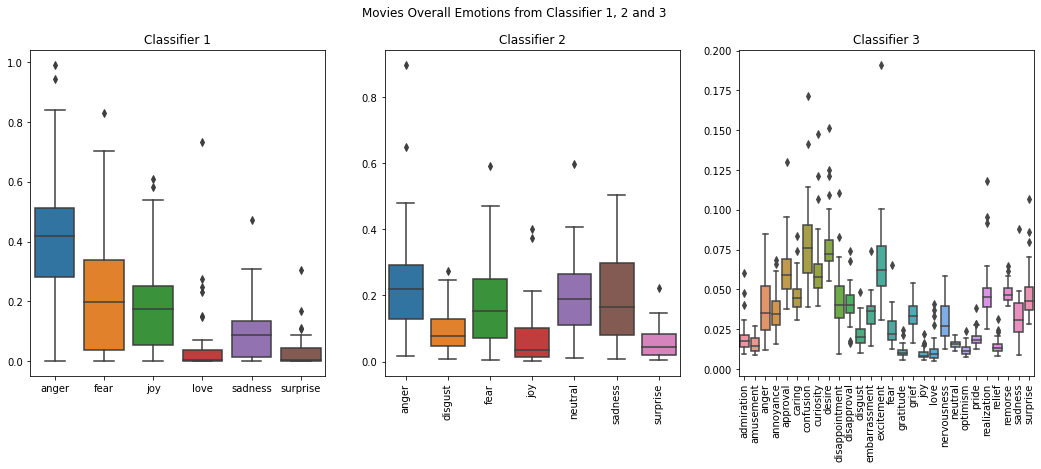

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Movies Overall Emotions from Classifier 1, 2 and 3 ')

sns.boxplot(ax=axes[0], data=all_emotions_df_1)
axes[0].set_title('Classifier 1')

sns.boxplot(ax=axes[1], data=all_emotions_df_2)
axes[1].set_xticklabels(all_emotions_df_2.columns, rotation=90)
axes[1].set_title('Classifier 2')

sns.boxplot(ax=axes[2], data=all_emotions_df_3)
axes[2].set_xticklabels(all_emotions_df_3.columns, rotation=90)
axes[2].set_title('Classifier 3')

For this analysis, we will utilize the dataset generated by extracting emotions from the movie plots in our original dataset using classifier 1. This process can be time-consuming, so we have saved the resulting dataframe as "movie_data_final_emotions.csv" for ease of access and will use it to further analyze these emotions.

In [ ]:
# this is how the movie_data_final_emotions.csv file was made, which takes a lot of time to run

moviedata_emotions_df = pd.read_csv(data_folder + 'OurData/movie_data_final.csv')
moviedata_emotions_df['chuncked_plot']= moviedata_emotions_df['plots'].apply(lambda x: chunks_list(str(x),LENGTH_CHUNKS))
moviedata_emotions_df['emotions_per_chunk']= moviedata_emotions_df['chuncked_plot'].apply(lambda x: emotions_per_chunk(x))

scores, labels= emotions_avg(moviedata_emotions_df['emotions_per_chunk'])
all_emotions_df= pd.DataFrame(scores, columns=labels)
moviedata_emotions_df = pd.concat([moviedata_emotions_df, all_emotions_df], axis=1).drop(columns=['chuncked_plot','emotions_per_chunk'])

moviedata_emotions_df.to_csv(data_folder + 'OurData/movie_data_final_emotions.csv', index=False)

**Analysis of Classifier 1:**

In [ ]:
imdb_data= pd.read_csv(data_folder+imdb_data_emotions, engine='python')
imdb_data2= imdb_data.copy()
imdb_data2.reset_index(inplace= True)
imdb_data2.drop(columns=imdb_data2.columns[0], axis=1, inplace=True)
imdb_data2.head(2)

,Unnamed: 0,tmdb_id,imdb_id,revenue,title,rating,votes,genres,plots,year,anger,fear,joy,love,sadness,surprise
0,4461,96128.0,tt0003471,1800000.0,Traffic in Souls,6.0,690,"['Crime', 'Drama']","A woman, with the aid of her police officer sw...",1913,0.025507,0.967425,0.002867,0.000568,0.002413,0.001221
1,4920,572090.0,tt0004391,5773000.0,Neptune's Daughter,6.0,52,['Fantasy'],The daughter of King Neptune takes on human fo...,1914,0.427986,0.202129,0.256236,0.007056,0.104935,0.001658


In [ ]:
#only keep year and emotions columns
imdb_data2.drop(columns= imdb_data2.columns[:9], axis= 1, inplace=True) 
imdb_data2.head(3)

,year,anger,fear,joy,love,sadness,surprise
0,1913,0.025507,0.967425,0.002867,0.000568,0.002413,0.001221
1,1914,0.427986,0.202129,0.256236,0.007056,0.104935,0.001658
2,1914,0.295850,0.491577,0.138985,0.012920,0.035761,0.024907


In [ ]:
na_values= imdb_data2['year'].isnull().values.sum()
print(f'Number of null values in year column: {na_values}'.format())

Number of null values in year column: 0


In [ ]:
print(f'Number of duplicated rows in the dataframe: {imdb_data2.duplicated().values.sum()}'.format())

Number of duplicated rows in the dataframe: 89


In [ ]:
# remove duplicate rows: 
print(f'length of dataframe before removing duplicate movie sentiments for the same year :{len(imdb_data2)}')
imdb_data2.drop_duplicates( keep='first', inplace=True)
print(f'length of dataframe after removing duplicate movie sentiments for the same year :{len(imdb_data2)}')

length of dataframe before removing duplicate movie sentiments for the same year :16963
length of dataframe after removing duplicate movie sentiments for the same year :16874


**Note:** We obtain a movie dataframe that contains unique plot outlines and plots, hence unique movies. We didn't drop duplicate titles 
because we have movies that have been refilmed and released with different plots, so we count them as different movies 
for our sentiment analysis

In [ ]:
movies_emotions_per_year= imdb_data2.groupby(by=['year'], as_index=False).mean()
movies_emotions_per_year.head(3)

,year,anger,fear,joy,love,sadness,surprise
0,1913,0.025507,0.967425,0.002867,0.000568,0.002413,0.001221
1,1914,0.385426,0.251848,0.210831,0.082573,0.060705,0.008618
2,1915,0.550551,0.189039,0.152462,0.024855,0.062212,0.020881


In [ ]:
print(f'Total number of unique years after grouping: {len(movies_emotions_per_year)}'.format())
print(f'First year of release: {movies_emotions_per_year.year.min()}'.format())
print(f'Last year of release: {movies_emotions_per_year.year.max()}'.format())

Total number of unique years after grouping: 109
First year of release: 1913
Last year of release: 2022


In [ ]:
colors = px.colors.qualitative
fig1= px.scatter(movies_emotions_per_year, x= 'year', y = 'surprise', 
                trendline="lowess", trendline_options=dict(frac=0.1),
                opacity=0.6).update_traces(marker=dict(color= colors.Prism[4]))
fig1.data[0].name="surprise"

fig2= px.scatter(movies_emotions_per_year, x='year', y = 'joy', 
                trendline="lowess", trendline_options=dict(frac=0.1), 
                 opacity=0.6).update_traces(marker=dict(color= colors.Set2[5]))
fig2.data[0].name="joy"

fig3= px.scatter(movies_emotions_per_year, x= 'year', y = 'fear', 
                trendline="lowess", trendline_options=dict(frac=0.1), 
                 opacity=0.45).update_traces(marker=dict(color= colors.Vivid[8]))
fig3.data[0].name="fear"

fig4= px.scatter(movies_emotions_per_year, x= 'year', y = 'anger', 
                trendline="lowess", trendline_options=dict(frac=0.1), 
                 opacity=0.5).update_traces(marker=dict(color= colors.Set1[0]))
fig4.data[0].name="anger"

fig5= px.scatter(movies_emotions_per_year, x= 'year', y = 'love', 
                trendline="lowess", trendline_options=dict(frac=0.1), 
                 opacity=0.6).update_traces(marker=dict(color= colors.Alphabet[12]))
fig5.data[0].name="love"

fig6= px.scatter(movies_emotions_per_year, x= 'year', y = 'sadness', 
                trendline="lowess", trendline_options=dict(frac=0.1), 
                 opacity=0.5).update_traces(marker=dict(color= colors.G10[0]))
fig6.data[0].name="sadness"

fig_final = go.Figure(data= fig1.data + fig2.data + fig3.data + fig4.data + fig5.data + fig6.data)

fig_final.update_layout(title_text='Popular movies\' emotions over the years ', 
                        title_x= 0.5, title_font_size= 20,
                        xaxis_title="Year", yaxis_title= 'Percentage of emotions per year',
                        template= 'plotly_white')
fig_final.update_traces(showlegend=True)
fig_final.show()

In [ ]:
fig_final.write_html("plot_emotions.html")

#### 2.3 Violence

In [79]:
# Preparing plots data
stemmer = nltk.stem.PorterStemmer()
stopwords = nltk.corpus.stopwords.words("english")
# Delete punctuation letters
imdb_data = imdb_data[imdb_data["plots"].notna()]
imdb_data["tokenized_plot_summary"] = imdb_data["plots"]\
    .apply(lambda text: "".join([ch for ch in text if ch not in string.punctuation]).strip())
# Toknize plot summaries
imdb_data["tokenized_plot_summary"] = imdb_data["tokenized_plot_summary"]\
    .apply(lambda text: nltk.word_tokenize(text))
# Delete stopwords, lower and stem
imdb_data["stemmed_plot_summary"] = imdb_data["tokenized_plot_summary"]\
    .apply(lambda tokens: [stemmer.stem(word.lower()) for word in tokens if word not in stopwords])

In [80]:
# Grievance Dictionary
url_dict = "https://drive.google.com/u/0/uc?id=12bVHlbN56X9X2Qz3OjVJk5aJZVvyYc2q&export=download"
output_dict = "dictionary_7plus.csv"
gdown.download(url_dict, output_dict)

df_grievance_dictionary = pd.read_csv("dictionary_7plus.csv")
df_grievance_dictionary.head(5)

Downloading...
From: https://drive.google.com/u/0/uc?id=12bVHlbN56X9X2Qz3OjVJk5aJZVvyYc2q&export=download
To: /content/dictionary_7plus.csv
100%|██████████| 143k/143k [00:00<00:00, 71.6MB/s]


,Unnamed: 0,category,word,mean_rating
0,1,deadline,accomplish,8.777778
1,2,deadline,action,7.600000
2,3,deadline,anxieti,7.823529
3,4,deadline,anxious,8.315789
4,5,deadline,approach,7.625000


In [81]:
# def preproc_plot(plot):
#   plot = str(plot)
#   # Preparing plots data
#   stemmer = nltk.stem.PorterStemmer()
#   stopwords = nltk.corpus.stopwords.words("english")
#   # Delete punctuation letters
#   tokenized_plot_summary = "".join([ch for ch in plot if ch not in string.punctuation]).strip()
#   # Toknize plot summaries
#   tokenized_plot_summary = nltk.word_tokenize(tokenized_plot_summary)
#   # Delete stopwords, lower and stem
#   tokenized_plot_summary = [stemmer.stem(word.lower()) for word in tokenized_plot_summary if word not in stopwords]

#   return tokenized_plot_summary
# imdb_data["tokenized_plot_summary"] = imdb_data["plots"].apply(lambda x: preproc_plot(x))

In [82]:
## Grievance Dictionary description
# How many entries
print("Number of grievance dictionary entries: ")
display(df_grievance_dictionary.shape)
# Words
print("Number of grievance dictionary unique words: ")
display(df_grievance_dictionary["word"].nunique())
# Categories
print("Number of grievance dictionary categories: ")
df_grievance_dictionary["category"].nunique()
print("Grievance dictionary categories: ")
display(df_grievance_dictionary["category"].unique())

Number of grievance dictionary entries: 


(3633, 4)

Number of grievance dictionary unique words: 


2479

Number of grievance dictionary categories: 
Grievance dictionary categories: 


array(['deadline', 'desperation', 'fixation', 'frustration', 'god',
       'grievance', 'hate', 'help', 'honour', 'impostor', 'jealousy',
       'loneliness', 'murder', 'paranoia', 'planning', 'relationship',
       'soldier', 'suicide', 'surveillance', 'threat', 'violence',
       'weaponry'], dtype=object)

In [83]:
# Choosing the right categories for our needs
df_grievance_relevant = df_grievance_dictionary[df_grievance_dictionary["category"]\
                                                .isin(['frustration', 'grievance', 'hate', 'murder', 'paranoia', 'threat', 'violence', 'soldier', 'suicide', 'weaponry'])]

In [84]:
# Normalizing the mean fit into category rating
def min_max_norm_plusone(df):
  min = df.min()
  max = df.max()
  return df.apply(lambda x: (x-min)/(max-min)+1)

df_grievance_relevant["norm_mean_rating"] = min_max_norm_plusone(df_grievance_relevant.loc[:, "mean_rating"])
df_grievance_relevant["norm_mean_rating"].head(5)

<ipython-input-84-949161397f28>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



303    1.132903
304    1.698925
305    1.407258
306    1.542742
307    1.809476
Name: norm_mean_rating, dtype: float64

In [85]:
# Function which measures general violence, not taking into account length of the plot
def general_violence(tokenized_plot, grievance_dictionary):
  violence_score = 0
  for word in grievance_dictionary["word"].unique():
    if word in tokenized_plot:
      violence_score += grievance_dictionary[grievance_dictionary["word"] == word]["norm_mean_rating"].mean()
  return violence_score

imdb_data["violence_score"] = imdb_data["stemmed_plot_summary"].apply(lambda x: general_violence(x, df_grievance_relevant))
imdb_data["violence_score"].head(5)

4461      5.088032
4920     56.868035
4936    286.853766
4951     71.977180
4985     40.145858
Name: violence_score, dtype: float64

In [86]:
# Function which measures general violence normalizing the score with plot length
def general_violence_normed(tokenized_plot, grievance_dictionary):
  violence_score = 0
  plot_length = len(tokenized_plot)
  violent_words = list(grievance_dictionary["word"].unique())
  for token in tokenized_plot:
    try:
        idx = violent_words.index(token)
        violence_score += grievance_dictionary[grievance_dictionary["word"] == violent_words[idx]]["norm_mean_rating"].mean()/plot_length
        break
    except ValueError:
        pass
  return violence_score

imdb_data["violence_score_norm"] = imdb_data["stemmed_plot_summary"].apply(lambda x: general_violence_normed(x, df_grievance_relevant))
imdb_data["violence_score_norm"].head(5)

4461    0.018517
4920    0.002089
4936    0.000120
4951    0.001281
4985    0.002199
Name: violence_score_norm, dtype: float64

In [87]:
# Violent words counts over the years dictionary
unique_violence_words = df_grievance_dictionary["word"].unique()

violent_words_in_years = dict()
for year in imdb_data.year.unique():
  violent_words = dict()
  for word in unique_violence_words:
    violent_words[word] = 0
  violent_words_in_years[year] = violent_words

for name, group in imdb_data.groupby(["year"]):
  year_dict = violent_words_in_years[name]
  for stemmed_plot in group["stemmed_plot_summary"]:
    for word in stemmed_plot:
      if word in unique_violence_words:
        year_dict[word] += 1

In [88]:
# # Saving the dictionary
# import pickle

# with open('violen_words_distribution.pickle', 'wb') as handle:
#     pickle.dump(violent_words_in_years, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [89]:
# Function which inferes top-k manifestation of violence
def violence_manifestation(tokenized_plot, grievance_dictionary, k):
  violent_words = dict()
  for word in grievance_dictionary["word"].unique():
    if word in tokenized_plot:
      violent_words[word] = grievance_dictionary[grievance_dictionary["word"] == word]["mean_rating"].mean()
  sorted_violent_words = sorted(violent_words.items(), key=lambda x: x[1], reverse = True)
  return list(sorted_violent_words)[:k]

imdb_data["violence_manifestations"] = imdb_data["stemmed_plot_summary"].apply(lambda x: violence_manifestation(x, df_grievance_relevant, 3))
imdb_data["violence_manifestations"].head(5)

4461    [(forc, 8.341450465243572), (attempt, 7.7125),...
4920    [(dagger, 9.26984126984127), (privat, 9.090909...
4936    [(veteran, 9.89473684210526), (aim, 9.71428571...
4951    [(violenc, 9.611111111111112), (brawl, 9.36842...
4985    [(mission, 9.31578947368421), (soldier, 9.1), ...
Name: violence_manifestations, dtype: object

In [90]:
# # Saving the table
# imdb_data["violence_manifestations"].to_html(index=False)
# text_file = open('violence_manifestations.html', 'w')

In [91]:
# # Saving all the data
# imdb_data.to_csv("final_data.csv")

In [92]:
# Regression for normalized violence score
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x = imdb_data["year"].unique().reshape(-1,1)
y = imdb_data.groupby("year")["violence_score_norm"] .mean().to_numpy().reshape(-1,1)

reg = LinearRegression().fit(x, y)

print(reg.coef_)
print(reg.intercept_)

[[1.54701958e-05]]
[-0.0242303]


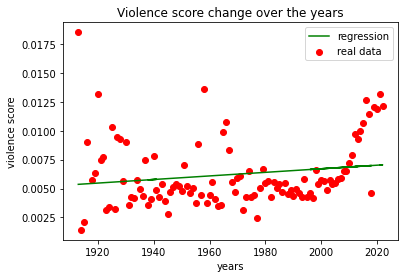

In [93]:
# Pyplot
plt.scatter(x, y, c='r')
plt.plot(x, reg.predict(x), c='g')
plt.title("Violence score change over the years")
plt.legend(["regression", "real data"])
plt.xlabel("years")
plt.ylabel("violence score")
plt.show()

In [94]:
# Plotly
import pandas as pd
violence_score_df = pd.DataFrame(data=np.array(np.c_[x, y, reg.predict(x)]), columns=['years','real_data','regression'])

import plotly.express as px
import plotly.graph_objects as go

colors = px.colors.qualitative

fig1 = px.scatter(violence_score_df, x='years', y = 'real_data').update_traces(marker=dict(color= colors.Set1[0]))
fig1.data[0].name="real data"
fig2 = px.line(violence_score_df, x='years', y = 'regression').update_traces(marker=dict(color= colors.Set1[1]))
fig2.data[0].name="regression"

fig_final = go.Figure(data= fig1.data + fig2.data)

fig_final.update_layout(title_text='Violence score change over the years',
                        xaxis_title='Years',
                        yaxis_title='Violence score', 
                        title_x= 0.5, title_font_size= 20,
                        template='plotly_white')
fig_final.update_traces(showlegend=True)
fig_final.show()
fig_final.write_html(data_folder + "violence_score_in_years_reg_norm.html") # scpecify your path 

### 3. What are sentiment indicators values for different genres of movies over the years?

In [ ]:
moviedata_emotions_df = pd.read_csv(data_folder + 'OurData/movie_data_final_emotions.csv')

In [ ]:
moviedata_emotions_df.head()

,Unnamed: 0,tmdb_id,imdb_id,revenue,title,rating,votes,genres,plots,year,anger,fear,joy,love,sadness,surprise
0,4461,96128.0,tt0003471,1800000.0,Traffic in Souls,6.0,690,"['Crime', 'Drama']","A woman, with the aid of her police officer sw...",1913,0.025507,0.967425,0.002867,0.000568,0.002413,0.001221
1,4920,572090.0,tt0004391,5773000.0,Neptune's Daughter,6.0,52,['Fantasy'],The daughter of King Neptune takes on human fo...,1914,0.427986,0.202129,0.256236,0.007056,0.104935,0.001658
2,4936,285226.0,tt0004336,1500000.0,The Million Dollar Mystery,6.0,39,"['Adventure', 'Mystery']",This twenty-three episode serial told the stor...,1914,0.295850,0.491577,0.138985,0.012920,0.035761,0.024907
3,4951,174104.0,tt0004630,4100000.0,The Spoilers,6.1,81,"['Drama', 'Western']",The Spoilers is a 1914 film directed by Colin ...,1914,0.371567,0.229215,0.296207,0.064683,0.033486,0.004842
4,4985,468031.0,tt0004545,87028.0,Rose of the Rancho,3.1,41,"['Action', 'Adventure', 'Romance', 'Western']","Esra Kincaid takes land by force and, having t...",1914,0.446300,0.084470,0.151894,0.245634,0.068637,0.003064


In [ ]:
len(moviedata_emotions_df)

16963

In [ ]:
# this checks, how many genres are there and makes the genres are stored in lists (not string)
# is there a more simple way to do this?

moviedata_emotions_df = moviedata_emotions_df.dropna(subset=["genres"])
genres_list = []
genres_as_lists = []
for i, row in enumerate(moviedata_emotions_df["genres"]):
   # print(row)
    #print(i)
    word_list = row.split("', '")
    for i, word in enumerate(word_list):
        word = ''.join(filter(str.isalnum, word))
        word_list[i] = word
    genres_as_lists.append(word_list)
    for genre in word_list:
        if genre not in genres_list:
            genres_list.append(genre)

    
print(genres_list)
different_genres = len(genres_list)
print(different_genres)
# this is quite inconvenient but I had problems with df.at and df.loc :D
moviedata_emotions_df["genres_as_lists"] = genres_as_lists
moviedata_emotions_df = moviedata_emotions_df.drop('genres', axis=1)
moviedata_emotions_df = moviedata_emotions_df.rename(columns={"genres_as_lists": "genres"})
moviedata_emotions_df = moviedata_emotions_df.reset_index()

['Crime', 'Drama', 'Fantasy', 'Adventure', 'Mystery', 'Western', 'Action', 'Romance', 'History', 'War', 'SciFi', 'Comedy', 'Horror', 'Thriller', 'Family', 'Short', 'Biography', 'Sport', 'Music', 'Musical', 'FilmNoir', 'Animation', 'Documentary', 'Adult', 'News', 'RealityTV', 'TalkShow', 'GameShow']
28


In [ ]:
len(moviedata_emotions_df)

16919

In [ ]:
# let's drop GameShow, TalkShow, RealityTV, News, Adult, FilmNoir, SciFi and Short because there is not enough data
# drop the genres also from genres_list

# I know this is not so well made I think :D

for i, row in enumerate(moviedata_emotions_df["genres"]):
    if "GameShow" in row:
        moviedata_emotions_df = moviedata_emotions_df.drop(index=i, axis=0)
    elif "TalkShow" in row:
        moviedata_emotions_df = moviedata_emotions_df.drop(index=i, axis=0)
    elif "RealityTV" in row:
        moviedata_emotions_df = moviedata_emotions_df.drop(index=i, axis=0)
    elif "News" in row:
        moviedata_emotions_df = moviedata_emotions_df.drop(index=i, axis=0)
    elif "Adult" in row:
        moviedata_emotions_df = moviedata_emotions_df.drop(index=i, axis=0) 
    elif "FilmNoir" in row:
        moviedata_emotions_df = moviedata_emotions_df.drop(index=i, axis=0) 
    elif "SciFi" in row:
        moviedata_emotions_df = moviedata_emotions_df.drop(index=i, axis=0) 
    elif "Short" in row:
        moviedata_emotions_df = moviedata_emotions_df.drop(index=i, axis=0)

genres_list.remove("GameShow")
genres_list.remove("TalkShow")
genres_list.remove("RealityTV")
genres_list.remove("News")
genres_list.remove("Adult")
genres_list.remove("FilmNoir")
genres_list.remove("SciFi")
genres_list.remove("Short")
print("We have now", len(moviedata_emotions_df), "genres")

We have now 15085 genres


###### Amounts of movies in different genres over the years

Text(-0.01, 0.4, 'Amount of movies')

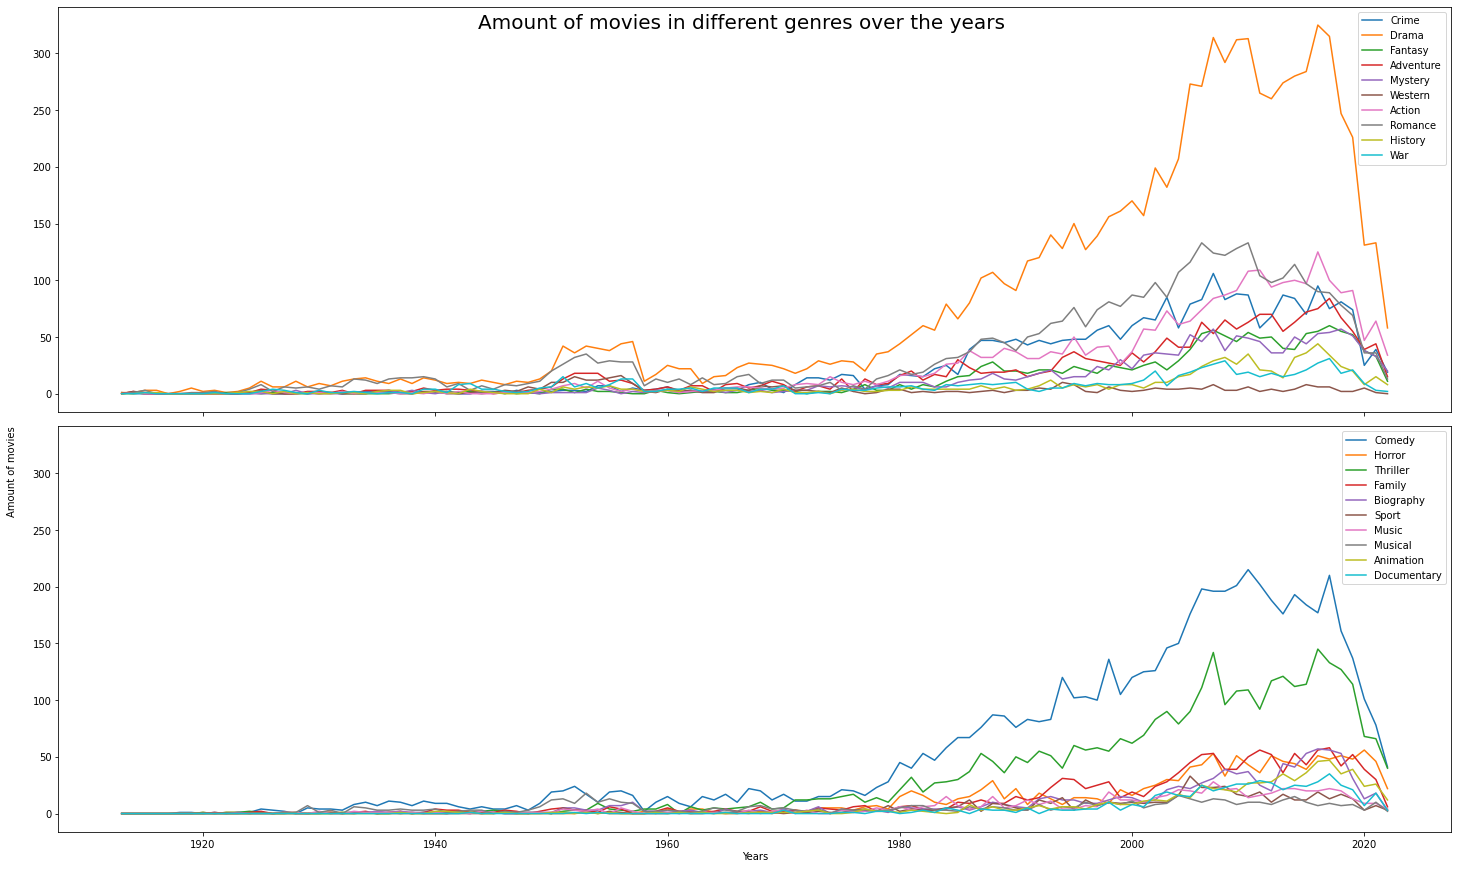

In [ ]:
# split the genres into 2 lists, just to make the plots more clear
genres_list_split = np.array_split(genres_list, 2)

fig, axes = plt.subplots(nrows = 2 , ncols = 1, figsize= (20,12), sharey = True, sharex = True)

for i, genre_list in enumerate(genres_list_split):
    genre_list = list(genre_list)
    
    for genre in genre_list:
        amounts_of_movies = {1913: [], 1914: [], 1915: [], 1916: [], 1917: [], 1918: [], 1919: [], 1920: [], 1921: [], 1922: [], 1923: [], 1924: [], 1925: [], 1926: [], 1927: [], 1928: [], 1929: [], 1930: [], 1931: [], 1932: [], 1933: [], 1934: [], 1935: [], 1936: [], 1937: [], 1938: [], 1939: [], 1940: [], 1941: [], 1942: [], 1943: [], 1944: [], 1945: [], 1946: [], 1947: [], 1948: [], 1949: [], 1950: [], 1951: [], 1952: [], 1953: [], 1954: [], 1955: [], 1956: [], 1957: [], 1958: [], 1959: [], 1960: [], 1961: [], 1962: [], 1963: [], 1964: [], 1965: [], 1966: [], 1967: [], 1968: [], 1969: [], 1970: [], 1971: [], 1972: [], 1973: [], 1974: [], 1975: [], 1976: [], 1977: [], 1978: [], 1979: [], 1980: [], 1981: [], 1982: [], 1983: [], 1984: [], 1985: [], 1986: [], 1987: [], 1988: [], 1989: [], 1990: [], 1991: [], 1992: [], 1993: [], 1994: [], 1995: [], 1996: [], 1997: [], 1998: [], 1999: [], 2000: [], 2001: [], 2002: [], 2003: [], 2004: [], 2005: [], 2006: [], 2007: [], 2008: [], 2009: [], 2010: [], 2011: [], 2012: [], 2013: [], 2014: [], 2015: [], 2016: [], 2017: [], 2018: [], 2019: [], 2020: [], 2021: [], 2022: []}
        
        for idx, movie_genre in enumerate(moviedata_emotions_df.genres):
                if genre in movie_genre:
                    amounts_of_movies[moviedata_emotions_df.iloc[idx].year].append(1)
    
        for key in amounts_of_movies:
            amounts_of_movies[key] = sum(amounts_of_movies[key])
        
        values = list(amounts_of_movies.values())
        keys = list(amounts_of_movies.keys())
        axes[i].plot(keys, values, label = genre)
        axes[i].legend()
    
fig.suptitle('Amount of movies in different genres over the years', fontsize=20)
fig.tight_layout()
fig.text(0.5, 0, "Years")
fig.text(-0.01, 0.4, "Amount of movies", rotation = 90)

From the plots above, we can see the amount of movies made in the different 20 genres over the years. We can see that drama is the most popular genre followed by comedy and thriller. All the genres follow roughly the same pattern: the increase in the movie industry in the 1980s can be seen in almost all genres. An interesting observation is that around 2015, the amount of movies started to decrease until this day. We can also see that for some genres, we have little data which has an impact on the results we will have when examining the sentiments of the movies.

In [ ]:
# more selling text for the website

From the plots above, we can see the amount of movies made in the different 20 genres over the years. We can see that drama is the most popular genre followed by comedy and thriller. All the genres follow roughly the same pattern: the increase in the movie industry in the 1980s can be seen in almost all genres. The impact of coronavirus can also be seen from the plots, in 2020 and 2021 all the lines drop. We can also detect that unfortunately for most of the genres, we have little data before 1950 – that's why we are observing different sentiments of the movies after 1950. However, when the movie industry increased after the 1970s, the coolest observations can be made after that!

###### Sentiment indicators values for different genres of movies over the years

Text(-0.01, 0.4, 'Means of sentiment values')

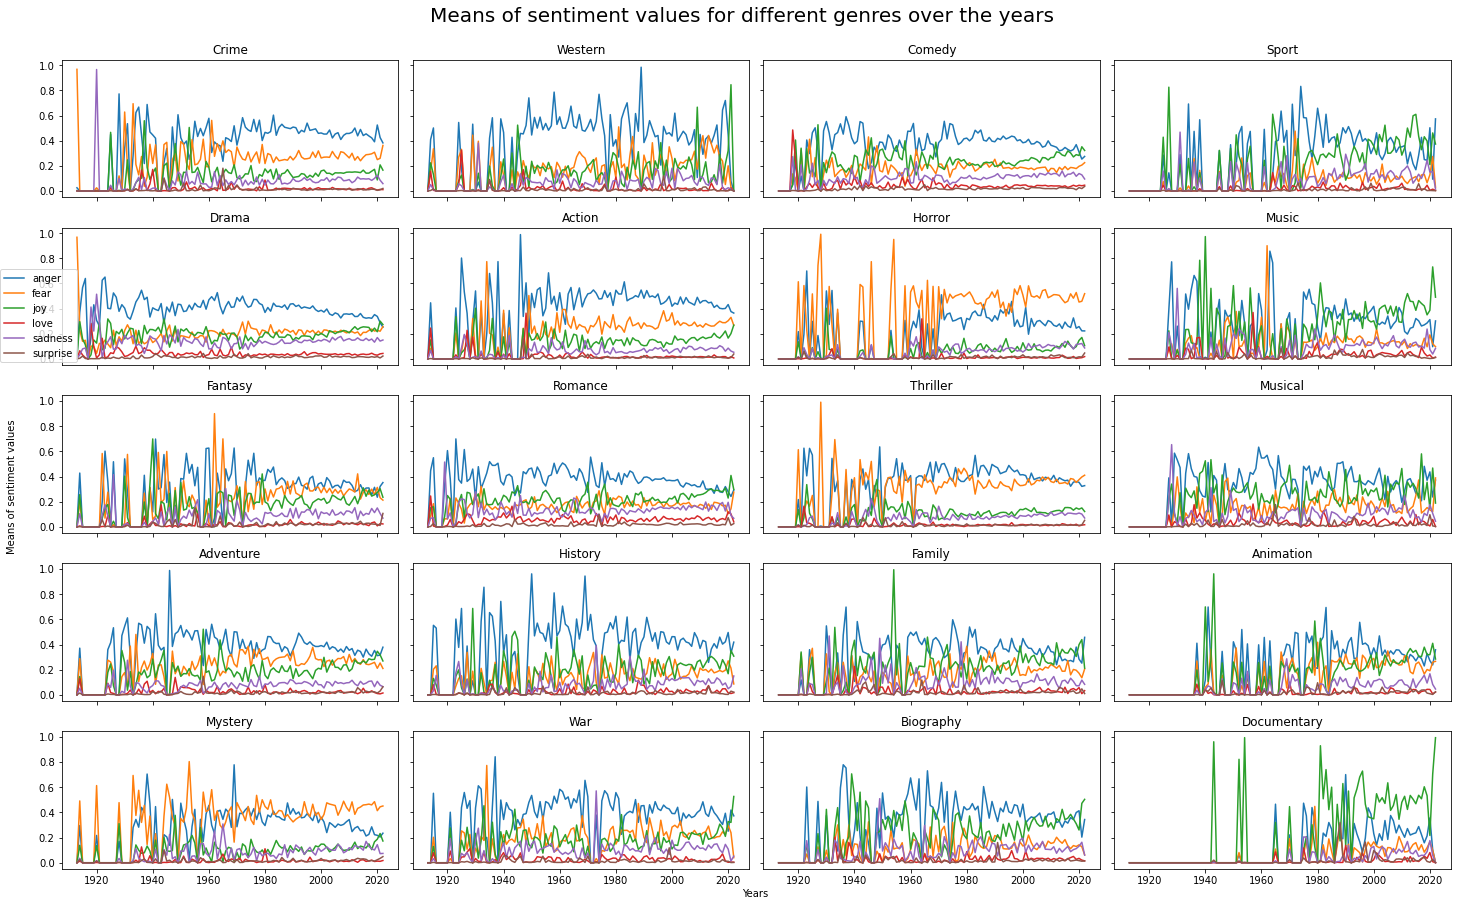

In [ ]:
# fig for 20 genres
fig, axes = plt.subplots(5, 4, figsize= (20,12), sharey = True, sharex = True)
colors = sns.color_palette("colorblind", different_genres)
color_list = colors.as_hex()
sentiments = ["anger", "fear", "joy", "love", "sadness", "surprise"]

# this loops over genres
for i, genre in enumerate(genres_list):
    amounts_of_movies = {1913: [], 1914: [], 1915: [], 1916: [], 1917: [], 1918: [], 1919: [], 1920: [], 1921: [], 1922: [], 1923: [], 1924: [], 1925: [], 1926: [], 1927: [], 1928: [], 1929: [], 1930: [], 1931: [], 1932: [], 1933: [], 1934: [], 1935: [], 1936: [], 1937: [], 1938: [], 1939: [], 1940: [], 1941: [], 1942: [], 1943: [], 1944: [], 1945: [], 1946: [], 1947: [], 1948: [], 1949: [], 1950: [], 1951: [], 1952: [], 1953: [], 1954: [], 1955: [], 1956: [], 1957: [], 1958: [], 1959: [], 1960: [], 1961: [], 1962: [], 1963: [], 1964: [], 1965: [], 1966: [], 1967: [], 1968: [], 1969: [], 1970: [], 1971: [], 1972: [], 1973: [], 1974: [], 1975: [], 1976: [], 1977: [], 1978: [], 1979: [], 1980: [], 1981: [], 1982: [], 1983: [], 1984: [], 1985: [], 1986: [], 1987: [], 1988: [], 1989: [], 1990: [], 1991: [], 1992: [], 1993: [], 1994: [], 1995: [], 1996: [], 1997: [], 1998: [], 1999: [], 2000: [], 2001: [], 2002: [], 2003: [], 2004: [], 2005: [], 2006: [], 2007: [], 2008: [], 2009: [], 2010: [], 2011: [], 2012: [], 2013: [], 2014: [], 2015: [], 2016: [], 2017: [], 2018: [], 2019: [], 2020: [], 2021: [], 2022: []}
    sentiment_df = pd.DataFrame(float(0), index=list(amounts_of_movies.keys()), columns=sentiments)
    
    # this loops over sentiments
    for sentiment in sentiments:
        # to this dictionary, we store the amount of movies of each year
            # had to make it manually because big problems with dict.fromkeys(years, [])
        amounts_of_movies = {1913: [], 1914: [], 1915: [], 1916: [], 1917: [], 1918: [], 1919: [], 1920: [], 1921: [], 1922: [], 1923: [], 1924: [], 1925: [], 1926: [], 1927: [], 1928: [], 1929: [], 1930: [], 1931: [], 1932: [], 1933: [], 1934: [], 1935: [], 1936: [], 1937: [], 1938: [], 1939: [], 1940: [], 1941: [], 1942: [], 1943: [], 1944: [], 1945: [], 1946: [], 1947: [], 1948: [], 1949: [], 1950: [], 1951: [], 1952: [], 1953: [], 1954: [], 1955: [], 1956: [], 1957: [], 1958: [], 1959: [], 1960: [], 1961: [], 1962: [], 1963: [], 1964: [], 1965: [], 1966: [], 1967: [], 1968: [], 1969: [], 1970: [], 1971: [], 1972: [], 1973: [], 1974: [], 1975: [], 1976: [], 1977: [], 1978: [], 1979: [], 1980: [], 1981: [], 1982: [], 1983: [], 1984: [], 1985: [], 1986: [], 1987: [], 1988: [], 1989: [], 1990: [], 1991: [], 1992: [], 1993: [], 1994: [], 1995: [], 1996: [], 1997: [], 1998: [], 1999: [], 2000: [], 2001: [], 2002: [], 2003: [], 2004: [], 2005: [], 2006: [], 2007: [], 2008: [], 2009: [], 2010: [], 2011: [], 2012: [], 2013: [], 2014: [], 2015: [], 2016: [], 2017: [], 2018: [], 2019: [], 2020: [], 2021: [], 2022: []}
        
        # this loops over the movies and finds the movies which match the genre
        for idx, movie_genre in enumerate(moviedata_emotions_df.genres):
            if genre in movie_genre:
                if sentiment == "anger":
                    sentiment_df.loc[moviedata_emotions_df.iloc[idx].year].anger += moviedata_emotions_df.iloc[idx].anger
                if sentiment == "fear":
                    sentiment_df.loc[moviedata_emotions_df.iloc[idx].year].fear += moviedata_emotions_df.iloc[idx].fear
                if sentiment == "joy":
                    sentiment_df.loc[moviedata_emotions_df.iloc[idx].year].joy += moviedata_emotions_df.iloc[idx].joy 
                if sentiment == "love":
                    sentiment_df.loc[moviedata_emotions_df.iloc[idx].year].love += moviedata_emotions_df.iloc[idx].love
                if sentiment == "sadness":
                    sentiment_df.loc[moviedata_emotions_df.iloc[idx].year].sadness += moviedata_emotions_df.iloc[idx].sadness
                if sentiment == "surprise":
                    sentiment_df.loc[moviedata_emotions_df.iloc[idx].year].surprise += moviedata_emotions_df.iloc[idx].surprise
                # adds +1 to the amount of movies of each year
                amounts_of_movies[moviedata_emotions_df.iloc[idx].year].append(1)
        
        # sums the lists to get the amounts of movies
        for key in amounts_of_movies:
            amounts_of_movies[key] = sum(amounts_of_movies[key])
    
    # this loop counts the means of each year's sentiments
    for index, row in sentiment_df.iterrows():
        if amounts_of_movies[index] > 0:
            sentiment_df.loc[index] = sentiment_df.loc[index].div(amounts_of_movies[index], axis=0)
            
    plot = sentiment_df.plot(kind="line", ax = axes[i%5, math.floor(i/5)])
    axes[i%5, math.floor(i/5)].get_legend().remove()
    plot.set_title(genre)

 
fig.tight_layout()
fig.legend(labels=["anger", "fear", "joy", "love", "sadness", "surprise"], loc = (0, 0.6))
fig.suptitle('Means of sentiment values for different genres over the years', y=1.03, fontsize=20)
fig.text(0.5, 0, "Years")
fig.text(-0.01, 0.4, "Means of sentiment values", rotation = 90)


From the 20 plots above, we can see how the sentiments have changed for different genres over the years. We get naturally the best results from the genres, from where we have enough data (for example crime, drama and comedy). For most of the genres, we have really high peaks for the movies before 1960 which means that there are just not enough movies with revenue data.

However, from the reasonable plots, we can examine some interesting results. The most eye-catching observation is that anger is the dominating sentiment in most of the plots. Can we then make a conclusion that movies with a lot of sentiments of anger are successful? We will examine that question in the next part below. After anger, fear and joy are the next biggest ones while love, sadness and surprise are the lowest sentiment values in every plot. One interesting observation is that joy has increased over the recent years in many genres, for instance in adventure, action, romance, war, comedy, animation. The best conclusion for that could be that people want more movies, which are easy and fun to watch – movies that leave a good feeling after watching. For example, we can notice that from the romance genre, where joy has increased a lot and catched up with anger. In fantasy movies, there is not as clear a difference of the sentiments than in some other genres when anger, fear and joy are mixed together. However, this is very typical for fantasy movies, where the topic areas can vary a lot and from the same genre one can find totally different movies. All in all, the overall trend that can be seen from the plots is that in many cases, anger is decreasing and joy is increasing. Potentially, people have started to be bored of the continuous violence and anger of the movies from the 1980s?

In [ ]:
# more selling text for the website

From the 20 plots above, we can see really fascinating data – how the sentiments have changed for different genres over the years.

Think about any movie you’ve watched: are there negative sentiments of anger? Most likely, you answered yes to that question.

That’s right, the most eye-catching observation is that anger is the dominating sentiment in most of the plots. Can we then make a conclusion that movies with a lot of sentiments of anger are successful? We will examine that question in the next part below. After anger, fear and joy are the next biggest ones while love, sadness and surprise are the lowest sentiment values in every plot.

However, after the huge amount of anger and fear, people love happy sentiments too! An interesting observation is that joy has increased over the recent years in many genres, for instance in adventure, action, romance, war, comedy, animation. Thus, people want more movies, which are easy and fun to watch – movies that leave a good feeling after watching. For example, we can notice that from the romance genre, where joy has greatly increased and catched up with anger. We can all relate to that happy feeling after watching a cheesy romantic movie with a lot of joy!

In fantasy movies, there is not as clear a difference of the sentiments than in some other genres when anger, fear and joy are mixed together. This makes complete sense since for fantasy movies, it's very typical that the topic areas vary a lot and from the same genre one can find totally different movies.

People love negative sentiments as anger and fear are still the general sentiments of many genres. Thus, an interesting question is: what will be the situation in the future? The overall trend that can be seen from the plots is that in many cases, anger is decreasing and joy is increasing. Potentially, moviegoers have started to be bored of the continuous violence and anger of the movies from the 1980s?

In [ ]:
# PLOTLY VERSIONS

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

color_template = px.colors.qualitative.Set1 #['#e0b130'] + px.colors.qualitative.Prism[6:-1] + px.colors.qualitative.Prism[:5]

In [ ]:
# plotly version

# split the genres into 2 lists, just to make the plots more clear

colors = color_template
fig = make_subplots(rows=2, cols=1, shared_yaxes=True, shared_xaxes=True, x_title="Years",
                    y_title="Amount of movies",)
genres_list_split = np.array_split(genres_list, 2)
c = 0 # index for colors
for i, genre_list in enumerate(genres_list_split):
    genre_list = list(genre_list)
    
    for genre in genre_list:
        amounts_of_movies = {1913: [], 1914: [], 1915: [], 1916: [], 1917: [], 1918: [], 1919: [], 1920: [], 1921: [], 1922: [], 1923: [], 1924: [], 1925: [], 1926: [], 1927: [], 1928: [], 1929: [], 1930: [], 1931: [], 1932: [], 1933: [], 1934: [], 1935: [], 1936: [], 1937: [], 1938: [], 1939: [], 1940: [], 1941: [], 1942: [], 1943: [], 1944: [], 1945: [], 1946: [], 1947: [], 1948: [], 1949: [], 1950: [], 1951: [], 1952: [], 1953: [], 1954: [], 1955: [], 1956: [], 1957: [], 1958: [], 1959: [], 1960: [], 1961: [], 1962: [], 1963: [], 1964: [], 1965: [], 1966: [], 1967: [], 1968: [], 1969: [], 1970: [], 1971: [], 1972: [], 1973: [], 1974: [], 1975: [], 1976: [], 1977: [], 1978: [], 1979: [], 1980: [], 1981: [], 1982: [], 1983: [], 1984: [], 1985: [], 1986: [], 1987: [], 1988: [], 1989: [], 1990: [], 1991: [], 1992: [], 1993: [], 1994: [], 1995: [], 1996: [], 1997: [], 1998: [], 1999: [], 2000: [], 2001: [], 2002: [], 2003: [], 2004: [], 2005: [], 2006: [], 2007: [], 2008: [], 2009: [], 2010: [], 2011: [], 2012: [], 2013: [], 2014: [], 2015: [], 2016: [], 2017: [], 2018: [], 2019: [], 2020: [], 2021: [], 2022: []}
        
        for idx, movie_genre in enumerate(moviedata_emotions_df.genres):
                if genre in movie_genre:
                    amounts_of_movies[moviedata_emotions_df.iloc[idx].year].append(1)
    
        for key in amounts_of_movies:
            amounts_of_movies[key] = sum(amounts_of_movies[key])
        
        values = list(amounts_of_movies.values())
        keys = list(amounts_of_movies.keys())
        row_value = i + 1
        if c <= 8 and colors==color_template:
            fig.add_trace(go.Scatter(x=keys, y=values, name=genre, mode='lines', orientation="h",
                                 marker=dict(color=colors[c]), legendgroup=i), row=row_value, col=1)
        else:
            fig.add_trace(go.Scatter(x=keys, y=values, name=genre, mode='lines', orientation="h",
                                 marker=dict(color=colors[c]), legendgroup=i), row=row_value, col=1)
        c += 1
        if c > 8 and colors==color_template:
            c=0
            colors=px.colors.qualitative.Vivid # changing the color template
        
            
    
fig.update_layout(title_text='Amount of movies in different genres over the years', template='plotly_white')
fig.update_traces(line=dict(width=1.6))
fig.show()

In [ ]:
# plotly version

# take only movies after 1950 to make the plots more clear, before 1950 too little data
moviedata_emotions_df_filtered = moviedata_emotions_df[moviedata_emotions_df['year'] >= 1950]
# fig for 20 genres
fig = make_subplots(rows=5, cols=4, shared_yaxes=True, shared_xaxes=True, x_title="Years",
                    y_title="Means of sentiment values", subplot_titles=("Crime", "Western", "Comedy", "Sport", "Drama", "Action", "Horror", "Music", "Fantasy", "Romance", "Thriller", "Musical", "Adventure", "History", "Family", "Animation", "Mystery", "War", "Biography", "Documentary"))



sentiments = ["anger", "fear", "joy", "love", "sadness", "surprise"]
colors = color_template

# this loops over genres
for i, genre in enumerate(genres_list):
    amounts_of_movies = {1950: [], 1951: [], 1952: [], 1953: [], 1954: [], 1955: [], 1956: [], 1957: [], 1958: [], 1959: [], 1960: [], 1961: [], 1962: [], 1963: [], 1964: [], 1965: [], 1966: [], 1967: [], 1968: [], 1969: [], 1970: [], 1971: [], 1972: [], 1973: [], 1974: [], 1975: [], 1976: [], 1977: [], 1978: [], 1979: [], 1980: [], 1981: [], 1982: [], 1983: [], 1984: [], 1985: [], 1986: [], 1987: [], 1988: [], 1989: [], 1990: [], 1991: [], 1992: [], 1993: [], 1994: [], 1995: [], 1996: [], 1997: [], 1998: [], 1999: [], 2000: [], 2001: [], 2002: [], 2003: [], 2004: [], 2005: [], 2006: [], 2007: [], 2008: [], 2009: [], 2010: [], 2011: [], 2012: [], 2013: [], 2014: [], 2015: [], 2016: [], 2017: [], 2018: [], 2019: [], 2020: [], 2021: [], 2022: []}
    sentiment_df = pd.DataFrame(float(0), index=list(amounts_of_movies.keys()), columns=sentiments)
    
    # this loops over sentiments
    for sentiment in sentiments:
        # to this dictionary, we store the amount of movies of each year
            # had to make it manually because big problems with dict.fromkeys(years, [])
        amounts_of_movies = {1950: [], 1951: [], 1952: [], 1953: [], 1954: [], 1955: [], 1956: [], 1957: [], 1958: [], 1959: [], 1960: [], 1961: [], 1962: [], 1963: [], 1964: [], 1965: [], 1966: [], 1967: [], 1968: [], 1969: [], 1970: [], 1971: [], 1972: [], 1973: [], 1974: [], 1975: [], 1976: [], 1977: [], 1978: [], 1979: [], 1980: [], 1981: [], 1982: [], 1983: [], 1984: [], 1985: [], 1986: [], 1987: [], 1988: [], 1989: [], 1990: [], 1991: [], 1992: [], 1993: [], 1994: [], 1995: [], 1996: [], 1997: [], 1998: [], 1999: [], 2000: [], 2001: [], 2002: [], 2003: [], 2004: [], 2005: [], 2006: [], 2007: [], 2008: [], 2009: [], 2010: [], 2011: [], 2012: [], 2013: [], 2014: [], 2015: [], 2016: [], 2017: [], 2018: [], 2019: [], 2020: [], 2021: [], 2022: []}
        
        # this loops over the movies and finds the movies which match the genre
        for idx, movie_genre in enumerate(moviedata_emotions_df_filtered.genres):
            if genre in movie_genre:
                if sentiment == "anger":
                    sentiment_df.loc[moviedata_emotions_df_filtered.iloc[idx].year].anger += moviedata_emotions_df_filtered.iloc[idx].anger
                if sentiment == "fear":
                    sentiment_df.loc[moviedata_emotions_df_filtered.iloc[idx].year].fear += moviedata_emotions_df_filtered.iloc[idx].fear
                if sentiment == "joy":
                    sentiment_df.loc[moviedata_emotions_df_filtered.iloc[idx].year].joy += moviedata_emotions_df_filtered.iloc[idx].joy 
                if sentiment == "love":
                    sentiment_df.loc[moviedata_emotions_df_filtered.iloc[idx].year].love += moviedata_emotions_df_filtered.iloc[idx].love
                if sentiment == "sadness":
                    sentiment_df.loc[moviedata_emotions_df_filtered.iloc[idx].year].sadness += moviedata_emotions_df_filtered.iloc[idx].sadness
                if sentiment == "surprise":
                    sentiment_df.loc[moviedata_emotions_df_filtered.iloc[idx].year].surprise += moviedata_emotions_df_filtered.iloc[idx].surprise
                # adds +1 to the amount of movies of each year
                amounts_of_movies[moviedata_emotions_df_filtered.iloc[idx].year].append(1)
        
        # sums the lists to get the amounts of movies
        for key in amounts_of_movies:
            amounts_of_movies[key] = sum(amounts_of_movies[key])
    
    # this loop counts the means of each year's sentiments
    for index, row in sentiment_df.iterrows():
        if amounts_of_movies[index] > 0:
            sentiment_df.loc[index] = sentiment_df.loc[index].div(amounts_of_movies[index], axis=0)  
        
    for k in range(0, len(sentiment_df.columns)-1):
        col_name = sentiments[k]
        fig.add_trace(go.Scatter(x=sentiment_df.index.values, y=sentiment_df[col_name],
                        mode='lines', orientation="h",
                        name=col_name, legendgroup=i, marker=dict(color=colors[k]), showlegend=(i==0)), row=(i%5) + 1, col=math.floor(i/5) + 1) #indexing starts from (1,1)



In [ ]:
fig.update_layout(height=900, width=1200, title_text='Means of sentiment values for different genres over the years', template='plotly_white')
fig.update_traces(line=dict(width=1.4))
fig.show()


### 4. How does sentiment indicator composition relate to the revenues and reviews?

In [95]:
moviedata_emotions_df = pd.read_csv(data_folder + imdb_data_emotions)
calculate_inflation(moviedata_emotions_df)

moviedata_violence_df = pd.read_csv(data_folder + imdb_data_violence, index_col=0)


In [96]:
# merge results from emotions and other sentiment features
moviedata_emotions_df['polarity'] = moviedata_violence_df.polarity.copy()
moviedata_emotions_df['subjectivity'] = moviedata_violence_df.subjectivity.copy()
moviedata_emotions_df['violence_score_norm'] = moviedata_violence_df.violence_score_norm.copy()

In [98]:
#keep only relevant data
moviedata_emotions_df = moviedata_emotions_df.query('revenue>0 and rating>0')

In [99]:
import scipy

sentiment_features = ["anger", "fear", "joy", "love", "sadness", "surprise", "violence_score_norm", "subjectivity", "polarity", "rating"]
pop = ["revenue", "rev_uninf", "rating"]
rev = []
un_rev = []
rating = []
for sentiment_feature in sentiment_features[:]:
    corr_rev = scipy.stats.pearsonr(moviedata_emotions_df.revenue, moviedata_emotions_df[sentiment_feature])
    rev.append(corr_rev[0])# if corr_rev[1] < 0.04 else 0)
    corr_un_rev = scipy.stats.pearsonr(moviedata_emotions_df.uninflated_revenue, moviedata_emotions_df[sentiment_feature])
    un_rev.append(corr_un_rev[0])# if corr_un_rev[1] < 0.04 else 0)
    corr_rating = scipy.stats.pearsonr(moviedata_emotions_df.rating, moviedata_emotions_df[sentiment_feature])
    rating.append(corr_rating[0] if corr_rating[0] < 0.9 else 0)# if corr_rating[1] < 0.04 else 0)

    print(f"correlations for {sentiment_feature}:")
    print(f"  > revenue | pearson: {corr_rev[0]:.4f} p-val {corr_rev[1]:4f} -> uni_rev | pearson: {corr_un_rev[0]:.4f} p-val {corr_un_rev[1]:.4f} -> rating  | pearson: {corr_rating[0]:.4f} p-val {corr_rating[1]:.4f}")

correlations for anger:
  > revenue | pearson: 0.0249 p-val 0.001261 -> uni_rev | pearson: 0.0328 p-val 0.0000 -> rating  | pearson: -0.0054 p-val 0.4828
correlations for fear:
  > revenue | pearson: 0.0652 p-val 0.000000 -> uni_rev | pearson: 0.0556 p-val 0.0000 -> rating  | pearson: -0.0714 p-val 0.0000
correlations for joy:
  > revenue | pearson: -0.0408 p-val 0.000000 -> uni_rev | pearson: -0.0440 p-val 0.0000 -> rating  | pearson: 0.0234 p-val 0.0025
correlations for love:
  > revenue | pearson: -0.0437 p-val 0.000000 -> uni_rev | pearson: -0.0317 p-val 0.0000 -> rating  | pearson: 0.0201 p-val 0.0094
correlations for sadness:
  > revenue | pearson: -0.0491 p-val 0.000000 -> uni_rev | pearson: -0.0484 p-val 0.0000 -> rating  | pearson: 0.0602 p-val 0.0000
correlations for surprise:
  > revenue | pearson: 0.0094 p-val 0.221866 -> uni_rev | pearson: 0.0081 p-val 0.2953 -> rating  | pearson: 0.0072 p-val 0.3523
correlations for violence_score_norm:
  > revenue | pearson: -0.1368 p-va

We can immediately exclude some correlations (revenue and surprise or subjectivity, anger ant ratings) based on p-values. These correlations are close to 0 anyway. The rest of the results is elaborated on at the website.

In [100]:
data=[rev, un_rev, rating]
fig = px.imshow(data,
                labels=dict(x="Sentiment feature", y="Popularity measure", color="Pearson corr."),
                x=sentiment_features,
                y=pop
)
fig.update_xaxes(side="top")
fig.update_layout(width=700, template='plotly_white')

#fig.write_html(data_folder + "htmls/pearson.html")
fig.show()

Plots for most significant correlations

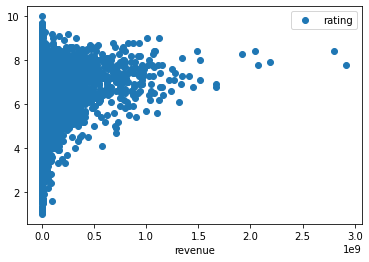

In [102]:
moviedata_emotions_df.plot(x='revenue', y='rating', marker='o', linewidth=0)

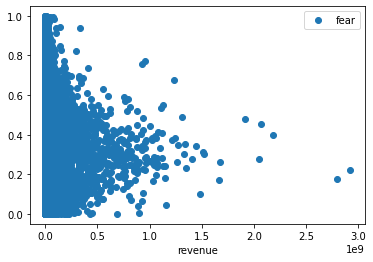

In [103]:
moviedata_emotions_df.plot(x='revenue', y='fear', marker='o', linewidth=0)